Import Libraries

In [45]:
import sys
import pandas as pd
import numpy as np
import random
import time
import os

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import xgboost

#Common Model Helpers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
pd.set_option('display.max_columns', None)


<div dir="rtl">

تابع data_description برای درک معنی متغییر هر ستون

</div>

In [2]:
# In order to have description of our Variables
def data_description(file_dest: str, feature_name: str):
    try:
        dict1 = {}
        with open(file_dest, 'r') as f:
            for line in f:
                if line.strip().split(maxsplit=1):
                    s = line.strip().split(maxsplit=1)
                    dict1[s[0]] = s[1]
        print(dict1[feature_name.strip()])
    except KeyError:
       return None


file_dest = "bank_variables.txt"
data_description(file_dest, feature_name='default')

has credit in default? (categorical: 'no','yes','unknown')


In [3]:
data = pd.read_csv("bank.csv", sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<div dir="rtl">

در این دیتاست missing value نداریم و داده ها از نوع int64(7) و object(10) هستند.

</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<div dir="rtl">

میانگین سنی حدودا 41 سال است.

توزیع متغییر duration غیر یکنواخت است و با جذر میتوان توزیع را یکنواخت کرد.

</div>

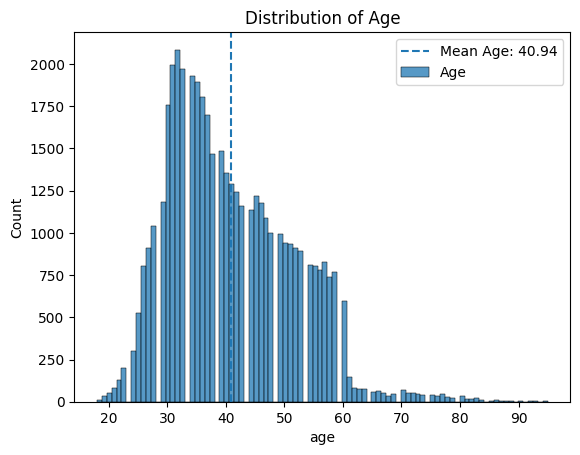

In [6]:
sns.histplot(x=data['age'], label='Age')
plt.axvline(x=data['age'].mean(), linestyle ="--",label='Mean Age: {}'.format(round(data['age'].mean(),2)))
plt.legend()
plt.title('Distribution of Age')
plt.show()

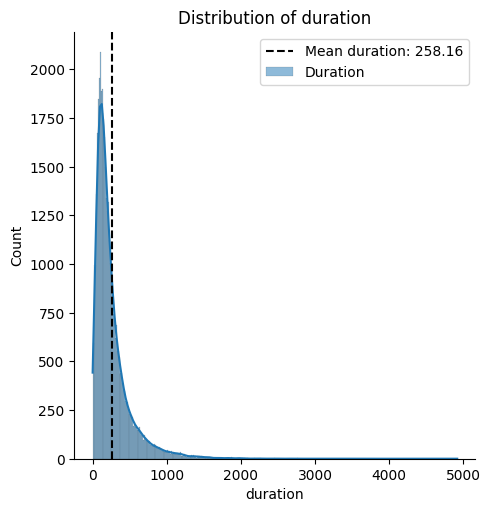

In [7]:
sns.displot(x=data['duration'],label='Duration', kde=True)
plt.axvline(x=data['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(data['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

<div dir="rtl">

در بین مشاغل، شغل blue collars کمترین تمایل را برای deposit در این کمپین را دارد.

شغل service کمترین balance را دارد.
و افراد بازنشسته بیشترین balance را دارند.
</div>

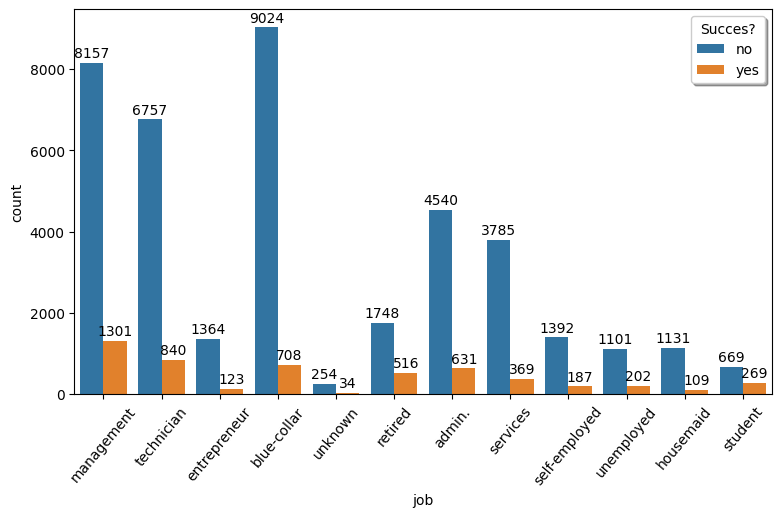

In [8]:
plt.figure(figsize=(9, 5))
g = sns.countplot(x= 'job', hue = 'y', data=data)
plt.xticks(rotation=50)
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

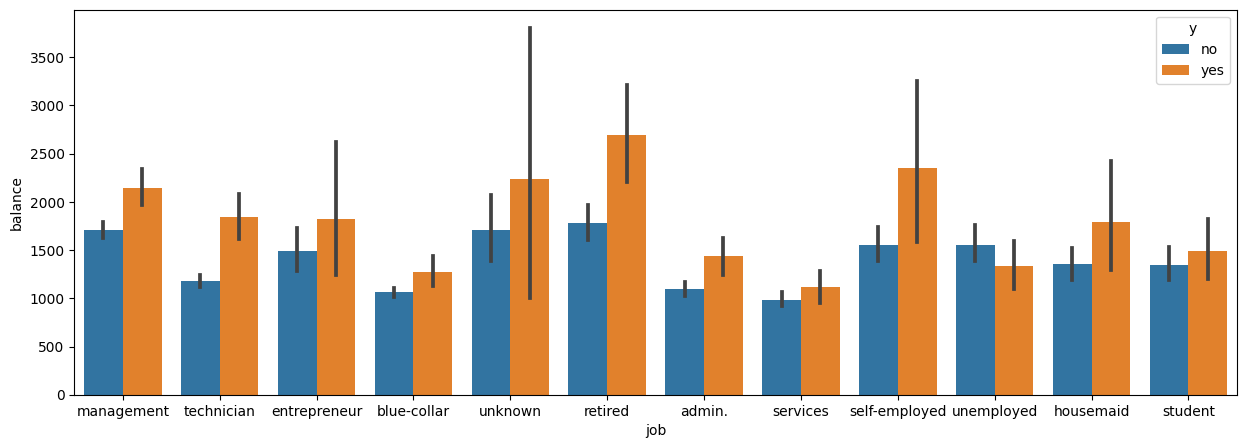

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x="job", y="balance", hue="y", data=data)
plt.show()

<div dir="rtl">

افرادی که married هستند بیشترین balance را دارند.

</div>

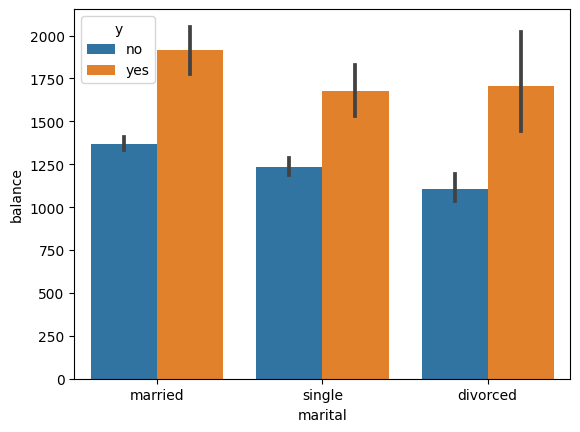

In [10]:
sns.barplot(x="marital", y="balance", hue="y", data=data)
plt.show()

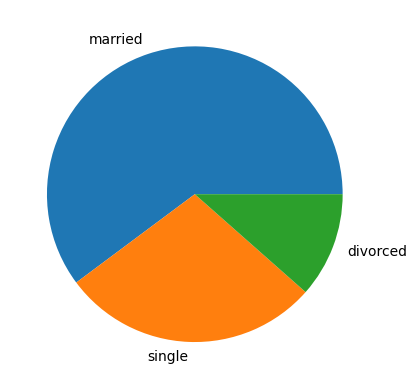

In [11]:
plt.pie(x=data["marital"].value_counts(), labels=data["marital"].value_counts().index)
plt.show()

<div dir="rtl">

نمای کلی(تعداد و درصد) از داده های categorical

</div>

                job      Ratio
job                           
blue-collar    9732  21.525735
management     9458  20.919688
technician     7597  16.803433
admin.         5171  11.437482
services       4154   9.188029
retired        2264   5.007631
self-employed  1579   3.492513
entrepreneur   1487   3.289023
unemployed     1303   2.882042
housemaid      1240   2.742695
student         938   2.074716
unknown         288   0.637013


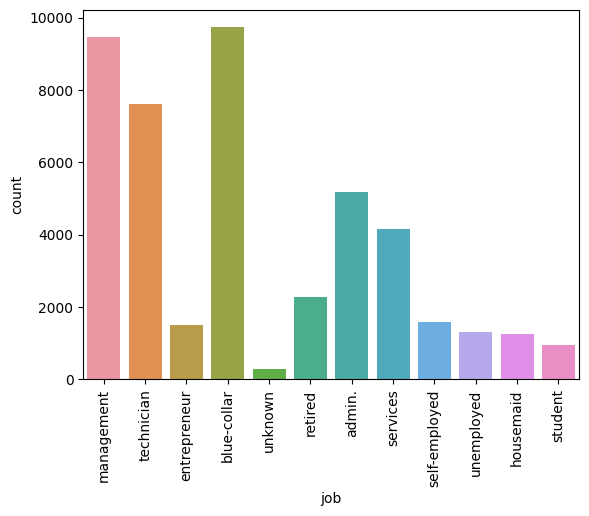

          marital      Ratio
marital                     
married     27214  60.193316
single      12790  28.289576
divorced     5207  11.517109


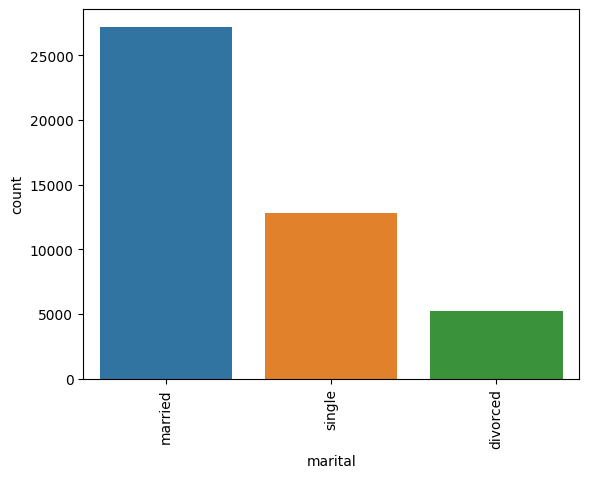

           education      Ratio
education                      
secondary      23202  51.319369
tertiary       13301  29.419831
primary         6851  15.153392
unknown         1857   4.107407


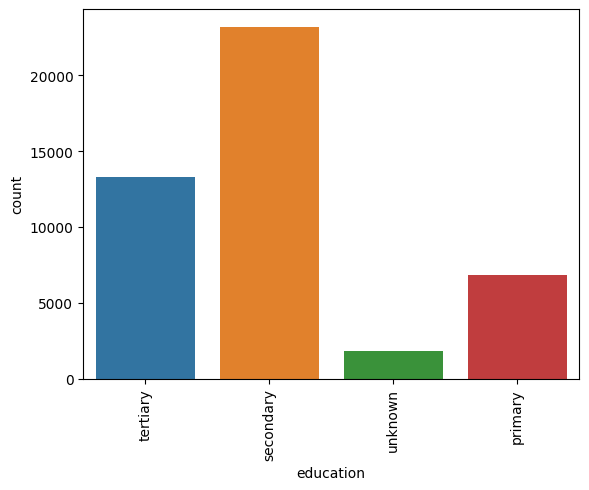

         default      Ratio
default                    
no         44396  98.197341
yes          815   1.802659


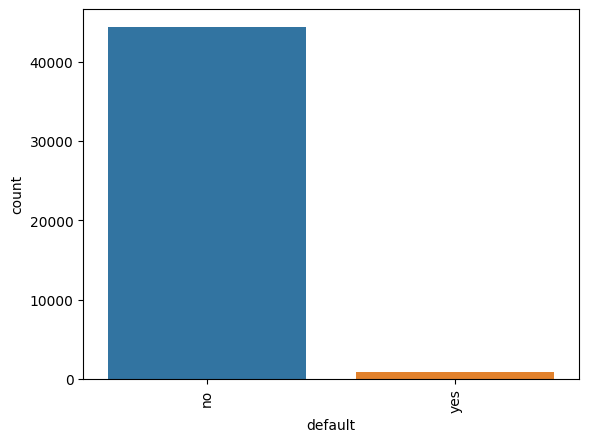

         housing      Ratio
housing                    
yes        25130  55.583818
no         20081  44.416182


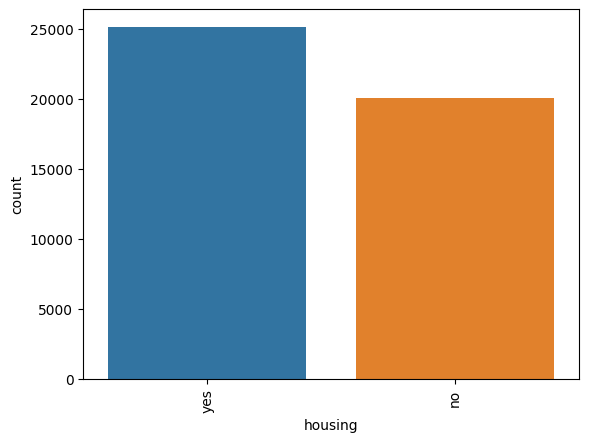

       loan      Ratio
loan                  
no    37967  83.977351
yes    7244  16.022649


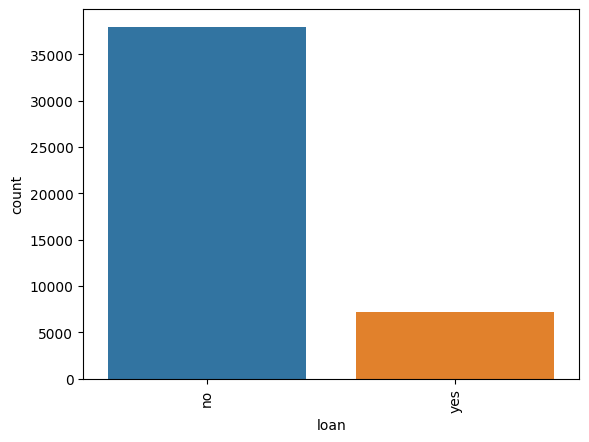

           contact      Ratio
contact                      
cellular     29285  64.774059
unknown      13020  28.798301
telephone     2906   6.427639


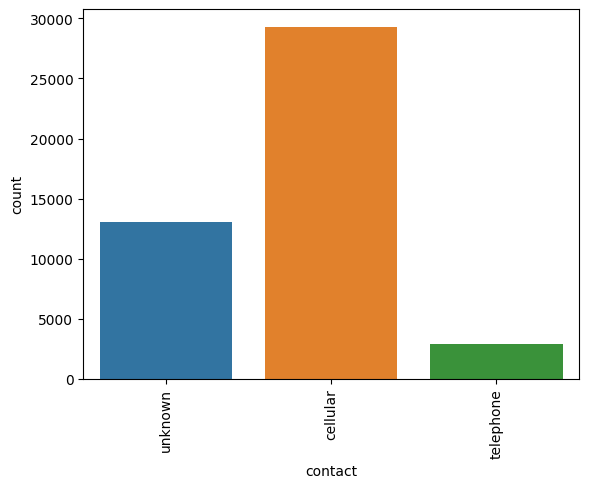

       month      Ratio
month                  
may    13766  30.448342
jul     6895  15.250713
aug     6247  13.817434
jun     5341  11.813497
nov     3970   8.781049
apr     2932   6.485147
feb     2649   5.859194
jan     1403   3.103227
oct      738   1.632346
sep      579   1.280662
mar      477   1.055053
dec      214   0.473336


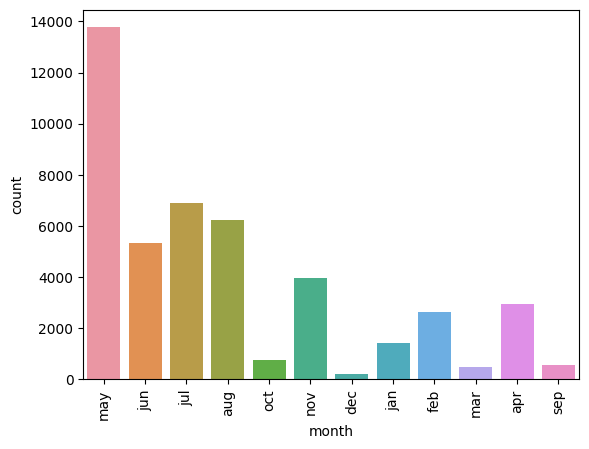

          poutcome      Ratio
poutcome                     
unknown      36959  81.747805
failure       4901  10.840282
other         1840   4.069806
success       1511   3.342107


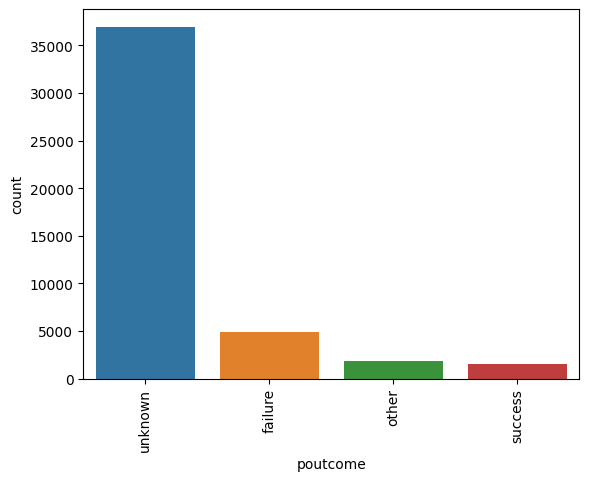

         y     Ratio
y                   
no   39922  88.30152
yes   5289  11.69848


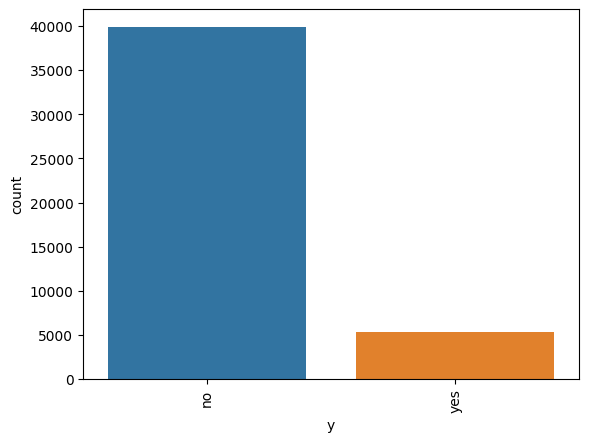

In [12]:
# categorical columns
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]

def cat_summary(dataframe, col_name, plot=False):
     print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                         "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
     if plot:
         sns.countplot(x=dataframe[col_name], data=dataframe)
         plt.xticks(rotation=90)
         plt.show(block=True)

for col in cat_cols:
    cat_summary(data, col, True)

<div dir="rtl">

 بعضی از متغییرها دارای داده unknown هستند که باید با انها به عنوان missing value رفتار کرد.

 تابع unknown_variable ستون هایی که دارای unknown هستند را به ما برمیگرداند.

</div>

In [13]:
def unknown_variable(data):
    l = []
    for c in data.columns:
        if "unknown" in data[c].value_counts().index:
            l += [c]
    return l

unknown_variable(data)

['job', 'education', 'contact', 'poutcome']

<div dir="rtl">

حدود 81.74 درصد متغییر unknown، poutcome میباشد و میتوان ستون poutcome را از دیتاست حذف کرد.

</div>

In [14]:
data["poutcome"].value_counts()/len(data["poutcome"])*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: count, dtype: float64

In [15]:
data.drop(columns=["poutcome"], inplace=True)

<div dir="rtl">

تبدیل unknown به missing value در ستون های 'job', 'education', 'contact'.

</div>

In [16]:
data['job'] = data['job'].replace('unknown', np.nan)
data['education'] = data['education'].replace('unknown', np.nan)
data['contact'] = data['contact'].replace('unknown', np.nan)

In [17]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['job', 'education', 'contact']] = si.fit_transform(data[['job', 'education', 'contact']])

<div dir="rtl">

یکنواخت کردن توزیع ستون duration با استفاده از np.sqrt()

</div>

In [18]:
# numerical columns
num_cols = [col for col in data.columns if data[col].dtypes != "O"]
print("numerical columns: ", num_cols)

numerical columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
skewness = data['duration'].skew()
kurtosis = data['duration'].kurt()
print("skewness:", skewness)
print("kurtosis:", kurtosis)

skewness: 3.144318099423456
kurtosis: 18.153915269019706


skewness after corrrection: 1.1737437144055878
kurtosis after correction: 2.3937727391892345


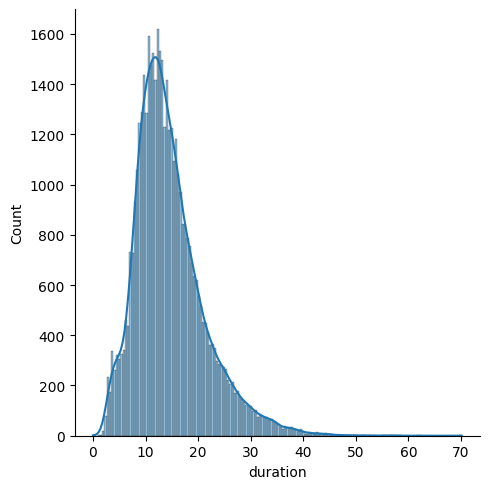

In [20]:
data['duration'] = np.sqrt(data['duration'])
skewness = data['duration'].skew()
kurtosis = data['duration'].kurt()
print("skewness after corrrection:", skewness)
print("kurtosis after correction:", kurtosis)


sns.displot(x=data['duration'],label='Duration', kde=True)
plt.show()

<div dir="rtl">

پیدا کردن و رفع outlier در ستون های age و duration

</div>

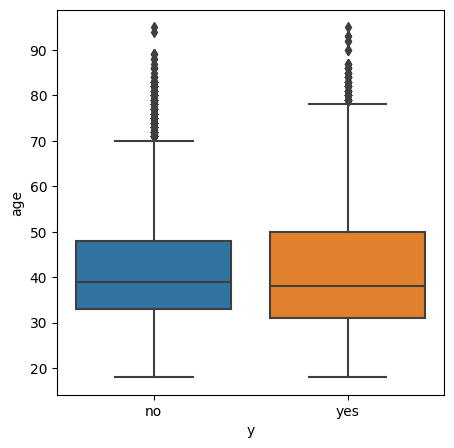

In [21]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=data["y"], y=data["age"])
plt.show()

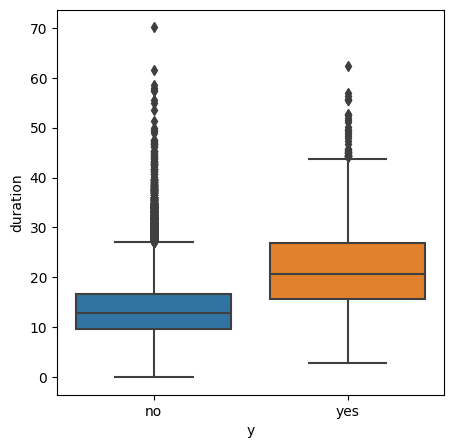

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=data["y"], y=data["duration"])
plt.show()

In [23]:
# handling age column outlier

def detect_outliers_zscore(data):
    import numpy as np
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

age_outliers = detect_outliers_zscore(data["age"])
print("Outliers from Z-scores method: ", len(age_outliers))

median = np.median(data["age"])
# Replace with median 
for i in age_outliers:     
    data.loc[data["age"]==i, "age"] = median

Outliers from Z-scores method:  381


In [24]:
# handling duration column outlier

def detect_outliers_zscore(data):
    import numpy as np
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

duration_outliers = detect_outliers_zscore(data["duration"])
print("Outliers from Z-scores method: ", len(duration_outliers))

median = np.median(data["duration"])
# Replace with median 
for i in duration_outliers:     
    data.loc[data["duration"]==i, "duration"] = median

Outliers from Z-scores method:  571


encoding

In [25]:
 # age_cat using pd.cut 
data['age_cat'] = pd.cut(data['age'], 5)
data.drop(columns=["age"], inplace=True)

In [26]:
# balance_cat using pd.qcut 
data['balance_cat'] = pd.qcut(data['balance'], 4)
data.drop(columns=["balance"], inplace=True)

In [27]:
# campaign_cat using pd.qcut
data['campaign_cat'] = pd.cut(data['campaign'], 4)
data.drop(columns=["campaign"], inplace=True)

In [28]:
# previous_cat using pd.qcut
data['previous_cat'] = pd.cut(data['previous'], 4)
data.drop(columns=["previous"], inplace=True)

In [29]:
# drop pdays because over %81 are -1 (means that the client wasnt contacted before or stands for missing data)
data.drop(columns=["pdays"], inplace=True)

data['day'] = data['day'].astype(object)

cat_data = ['job', 'age_cat', 'marital', 'education', 'default', 'balance_cat',	'housing',	'loan',	'contact', 'day', 'month', 'campaign_cat', 'previous_cat',	'y']

enc = OrdinalEncoder()
data[cat_data] = enc.fit_transform(data[cat_data])

In [30]:
Y = data[["y"]]
data.drop(columns=["y"], inplace=True)
X = data

In [31]:
mms = MinMaxScaler()
Y = mms.fit_transform(Y)
X = mms.fit_transform(X)

XGBoostClassification, KNeighborsClassifier, SVM

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [44]:
# XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_clf.fit(X_train,y_train)

# y_train_preds = xgb.predict(X_train)
y_test_preds = xgb_clf.predict(X_test)
y_train_preds = xgb_clf.predict(X_train)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

print(metrics.classification_report(y_test, y_test_preds))

XGB accuracy score for train: 0.925: test: 0.895
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      8004
         1.0       0.57      0.36      0.44      1039

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



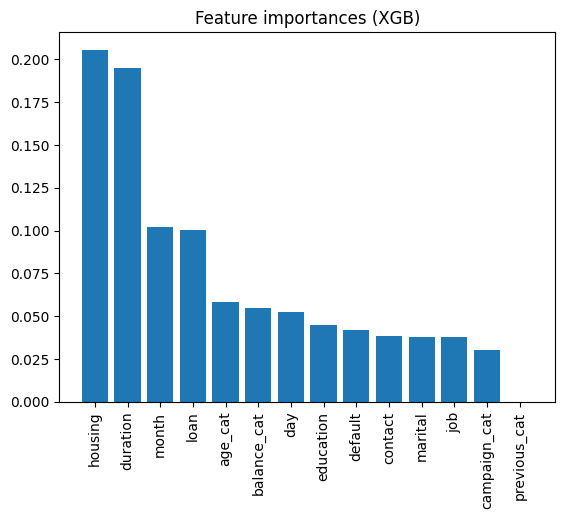

In [54]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(data.columns, xgb_clf.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

gridsearch for xgboost

In [59]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = XGBClassifier(random_state=100)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best score:  0.8970638520854923


In [62]:
# XGBClassifier after gridsearch
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.7, colsample_bytree=1, max_depth=7)
xgb_clf.fit(X_train,y_train)

# y_train_preds = xgb.predict(X_train)
y_test_preds = xgb_clf.predict(X_test)
y_train_preds = xgb_clf.predict(X_train)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

print(metrics.classification_report(y_test, y_test_preds))

XGB accuracy score for train: 0.929: test: 0.893
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      8004
         1.0       0.55      0.36      0.44      1039

    accuracy                           0.89      9043
   macro avg       0.74      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



In [39]:
# KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=10)
kn_clf.fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

e:\programming practice\yolov7\venv7\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      8004
         1.0       0.53      0.07      0.12      1039

    accuracy                           0.89      9043
   macro avg       0.71      0.53      0.53      9043
weighted avg       0.85      0.89      0.85      9043



In [35]:
svm_clf = svm.SVC(C=15, kernel='linear', random_state=100)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

e:\programming practice\yolov7\venv7\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      8004
         1.0       0.00      0.00      0.00      1039

    accuracy                           0.89      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.89      0.83      9043



e:\programming practice\yolov7\venv7\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\programming practice\yolov7\venv7\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\programming practice\yolov7\venv7\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
